In [ ]:
import json
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from random import randrange

In [ ]:
ps = PorterStemmer()
with open('reviewSamples20.json') as f:
    data = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
m = randrange(len(data))
preStem = []
stems = []
business_id = data[m]['business_id']
for j in range(len(data)):
    if(data[j]['business_id'] == business_id):
        word = word_tokenize(str(data[j]['text']))
        for w in word:  
            preStem.append(w)
            stems.append(ps.stem(w))

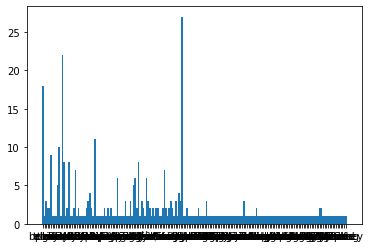

In [ ]:
counts = Counter(preStem).items()
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

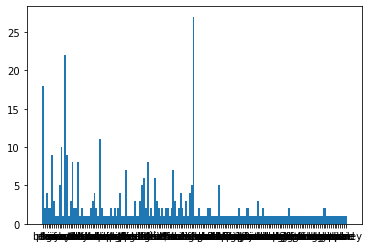

In [ ]:
counts = Counter(stems).items()
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

In [ ]:
i = randrange(len(data))
preStem_2 = []
stems_2 = []
business_id = data[i]['business_id']
for j in range(len(data)):
    if(data[j]['business_id'] == business_id):
        print(data[i]['text'])
        words = word_tokenize(str(data[i]['text']))
        for w in words:
            if(w != "," and w != "." and w != "a" and w != "the" and w != "of" and w != "and"):
                preStem_2.append(w)
                print(w, " : ", ps.stem(w))
            if(ps.stem(w) != "," and ps.stem(w) != "." and ps.stem(w) != "a" and ps.stem(w) != "the" and ps.stem(w) != "of" and ps.stem(w) != "and"):
                stems_2.append(ps.stem(w))

My family and I came in on Wed. Night for dinner we had a party of 6 plus a baby(using a high chair). We had to wait about 10 mins to be seated and when we got to our table it was against the wall, half booth half chairs. My husband asked to sit at another table but the hostess said "No" so we had the baby between our table and the customers next to us, luckily she's a great baby!! The table and booth were dirty and floor was sticky, gross, and I had to kick a fork out from under my seat. The service was subpar but the waiter was nice. It took 20 mins for my boys to get their drinks and refills, well they were sparse to say the least. I ordered steamed broccoli which was actually raw when it came out the first time but they, what I believe, microwaved it to warm it up. My poor daughter in law had a charcoal patty which she sent back and it took a good 25-30 mins to be replaced.
The worse part is my son has a sensitivity to gluten so he ordered a gluten free bun but they gave him a Ciab

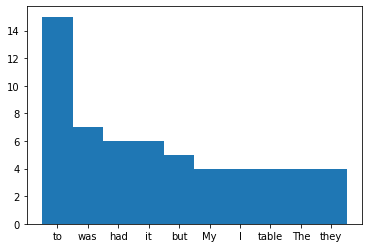

In [ ]:
counts = Counter(preStem_2).most_common(10)
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

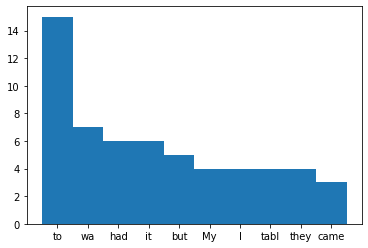

In [ ]:
counts = Counter(stems_2).most_common(10)
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()